In [1]:
%matplotlib inline
import sys, os, glob

from astropy.io import fits, ascii

import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
import astropy.constants as const
from astropy.coordinates import SkyCoord, concatenate
from astropy import table

In [2]:
import scienceplots

plt.style.use([ 'bright', 'science', 'no-latex', 'notebook'])

In [3]:
import pyqsofit
from pyqsofit.PyQSOFit import QSOFit
print(pyqsofit.__version__)

1.2.0


## Setup PyQSOFit

In [4]:
path_ex = os.path.join('.')

# create a header
hdr0 = fits.Header()
hdr0['Author'] = 'Hengxiao Guo'
primary_hdu = fits.PrimaryHDU(header=hdr0)

In [5]:
newdata = np.rec.array([
    (6564.61, 'Ha', 6400, 6800, 'Ha_br', 3, 0.0, 0.0, 1e10, 5e-3, 0.004, 0.05, 0.015, 0, 0, 0, 0.05, 1),
    (6564.61, 'Ha', 6400, 6800, 'Ha_na', 1, 0.0, 0.0, 1e10, 1e-3, 5e-4, 0.00169, 0.01, 1, 1, 0, 0.002, 1),
    (6549.85, 'Ha', 6400, 6800, 'NII6549', 1, 0.0, 0.0, 1e10, 1e-3, 2.3e-4, 0.00169, 5e-3, 1, 1, 1, 0.001, 1),
    (6585.28, 'Ha', 6400, 6800, 'NII6585', 1, 0.0, 0.0, 1e10, 1e-3, 2.3e-4, 0.00169, 5e-3, 1, 1, 1, 0.003, 1),
    (6718.29, 'Ha', 6400, 6800, 'SII6718', 1, 0.0, 0.0, 1e10, 1e-3, 2.3e-4, 0.00169, 5e-3, 1, 1, 2, 0.001, 1),
    (6732.67, 'Ha', 6400, 6800, 'SII6732', 1, 0.0, 0.0, 1e10, 1e-3, 2.3e-4, 0.00169, 5e-3, 1, 1, 2, 0.001, 1),

    (4862.68, 'Hb', 4640, 5100, 'Hb_br', 3, 0.0, 0.0, 1e10, 5e-3, 0.004, 0.05, 0.01, 0, 0, 0, 0.01, 1),
    (4862.68, 'Hb', 4640, 5100, 'Hb_na', 1, 0.0, 0.0, 1e10, 1e-3, 2.3e-4, 0.00169, 0.01, 1, 1, 0, 0.002, 1),
    (4960.30, 'Hb', 4640, 5100, 'OIII4959c', 1, 0.0, 0.0, 1e10, 1e-3, 2.3e-4, 0.00169, 0.01, 1, 1, 0, 0.002, 1),
    (5008.24, 'Hb', 4640, 5100, 'OIII5007c', 1, 0.0, 0.0, 1e10, 1e-3, 2.3e-4, 0.00169, 0.01, 1, 1, 0, 0.004, 1),
    (4960.30, 'Hb', 4640, 5100, 'OIII4959w',   1, 0.0, 0.0, 1e10, 3e-3, 2.3e-4, 0.004,  0.01,  2, 2, 0, 0.001, 1),
    (5008.24, 'Hb', 4640, 5100, 'OIII5007w',   1, 0.0, 0.0, 1e10, 3e-3, 2.3e-4, 0.004,  0.01,  2, 2, 0, 0.002, 1),
    #(4687.02, 'Hb', 4640, 5100, 'HeII4687_br', 1, 0.0, 0.0, 1e10, 5e-3, 0.004,  0.05,   0.005, 0, 0, 0, 0.001, 1),
    #(4687.02, 'Hb', 4640, 5100, 'HeII4687_na', 1, 0.0, 0.0, 1e10, 1e-3, 2.3e-4, 0.00169, 0.005, 1, 1, 0, 0.001, 1),

    #(3934.78, 'CaII', 3900, 3960, 'CaII3934' , 2, 0.0, 0.0, 1e10, 1e-3, 3.333e-4, 0.00169, 0.01, 99, 0, 0, -0.001, 1),

    #(3728.48, 'OII', 3650, 3800, 'OII3728', 1, 0.0, 0.0, 1e10, 1e-3, 3.333e-4, 0.00169, 0.01, 1, 1, 0, 0.001, 1),

    #(3426.84, 'NeV', 3380, 3480, 'NeV3426',    1, 0.0, 0.0, 1e10, 1e-3, 3.333e-4, 0.00169, 0.01, 0, 0, 0, 0.001, 1),
    #(3426.84, 'NeV', 3380, 3480, 'NeV3426_br', 1, 0.0, 0.0, 1e10, 5e-3, 0.0025,   0.02,   0.01, 0, 0, 0, 0.001, 1),

    (2798.75, 'MgII', 2700, 2900, 'MgII_br', 2, 0.0, 0.0, 1e10, 5e-3, 0.004, 0.05, 0.015, 0, 0, 0, 0.05, 1),
    (2798.75, 'MgII', 2700, 2900, 'MgII_na', 1, 0.0, 0.0, 1e10, 1e-3, 5e-4, 0.00169, 0.01, 1, 1, 0, 0.002, 1),

    (1908.73, 'CIII', 1700, 1970, 'CIII_br', 2, 0.0, 0.0, 1e10, 5e-3, 0.004, 0.05, 0.015, 99, 0, 0, 0.01, 1),
    #(1908.73, 'CIII', 1700, 1970, 'CIII_na',   1, 0.0, 0.0, 1e10, 1e-3, 5e-4,  0.00169, 0.01,  1, 1, 0, 0.002, 1),
    #(1892.03, 'CIII', 1700, 1970, 'SiIII1892', 1, 0.0, 0.0, 1e10, 2e-3, 0.001, 0.015,  0.003, 1, 1, 0, 0.005, 1),
    #(1857.40, 'CIII', 1700, 1970, 'AlIII1857', 1, 0.0, 0.0, 1e10, 2e-3, 0.001, 0.015,  0.003, 1, 1, 0, 0.005, 1),
    #(1816.98, 'CIII', 1700, 1970, 'SiII1816',  1, 0.0, 0.0, 1e10, 2e-3, 0.001, 0.015,  0.01,  1, 1, 0, 0.0002, 1),
    #(1786.7,  'CIII', 1700, 1970, 'FeII1787',  1, 0.0, 0.0, 1e10, 2e-3, 0.001, 0.015,  0.01,  1, 1, 0, 0.0002, 1),
    #(1750.26, 'CIII', 1700, 1970, 'NIII1750',  1, 0.0, 0.0, 1e10, 2e-3, 0.001, 0.015,  0.01,  1, 1, 0, 0.001, 1),
    #(1718.55, 'CIII', 1700, 1900, 'NIV1718',   1, 0.0, 0.0, 1e10, 2e-3, 0.001, 0.015,  0.01,  1, 1, 0, 0.001, 1),

    (1549.06, 'CIV', 1500, 1700, 'CIV_br', 3, 0.0, 0.0, 1e10, 5e-3, 0.004, 0.05, 0.015, 0, 0, 0, 0.05, 1),
    # (1549.06, 'CIV', 1500, 1700, 'CIV_na', 1, 0.0, 0.0, 1e10, 1e-3, 5e-4, 0.00169, 0.01, 1, 1, 0, 0.002, 1),
    #(1640.42, 'CIV', 1500, 1700, 'HeII1640',    1, 0.0, 0.0, 1e10, 1e-3, 5e-4,   0.00169, 0.008, 1, 1, 0, 0.002, 1),
    #(1663.48, 'CIV', 1500, 1700, 'OIII1663',    1, 0.0, 0.0, 1e10, 1e-3, 5e-4,   0.00169, 0.008, 1, 1, 0, 0.002, 1),
    #(1640.42, 'CIV', 1500, 1700, 'HeII1640_br', 1, 0.0, 0.0, 1e10, 5e-3, 0.0025, 0.02,   0.008, 1, 1, 0, 0.002, 1),
    #(1663.48, 'CIV', 1500, 1700, 'OIII1663_br', 1, 0.0, 0.0, 1e10, 5e-3, 0.0025, 0.02,   0.008, 1, 1, 0, 0.002, 1),

    #(1402.06, 'SiIV', 1290, 1450, 'SiIV_OIV1', 1, 0.0, 0.0, 1e10, 5e-3, 0.002, 0.05,  0.015, 1, 1, 0, 0.05, 1),
    #(1396.76, 'SiIV', 1290, 1450, 'SiIV_OIV2', 1, 0.0, 0.0, 1e10, 5e-3, 0.002, 0.05,  0.015, 1, 1, 0, 0.05, 1),
    #(1335.30, 'SiIV', 1290, 1450, 'CII1335',   1, 0.0, 0.0, 1e10, 2e-3, 0.001, 0.015, 0.01,  1, 1, 0, 0.001, 1),
    #(1304.35, 'SiIV', 1290, 1450, 'OI1304',    1, 0.0, 0.0, 1e10, 2e-3, 0.001, 0.015, 0.01,  1, 1, 0, 0.001, 1),

    (1215.67, 'Lya', 1150, 1290, 'Lya_br', 3, 0.0, 0.0, 1e10, 5e-3, 0.002, 0.05, 0.02, 0, 0, 0, 0.05, 1),
    (1240.14, 'Lya', 1150, 1290, 'NV1240', 1, 0.0, 0.0, 1e10, 2e-3, 0.001, 0.01, 0.005, 0, 0, 0, 0.002, 1),
    # (1215.67, 'Lya', 1150, 1290, 'Lya_na', 1, 0.0, 0.0, 1e10, 1e-3, 5e-4, 0.00169, 0.01, 0, 0, 0, 0.002, 1),
    ],

    formats='float32,    a20,  float32, float32,      a20,  int32, float32, float32, float32, float32, float32, float32, float32,   int32,  int32,  int32, float32, int32',
    names=' lambda, compname,   minwav,  maxwav, linename, ngauss,  inisca,  minsca,  maxsca,  inisig,  minsig,  maxsig,    voff,  vindex, windex, findex,  fvalue,  vary')

# Header
hdr1 = fits.Header()
hdr1['lambda'] = 'Vacuum Wavelength in Ang'
hdr1['minwav'] = 'Lower complex fitting wavelength range'
hdr1['maxwav'] = 'Upper complex fitting wavelength range'
hdr1['ngauss'] = 'Number of Gaussians for the line'

# Can be set to negative for absorption lines if you want
hdr1['inisca'] = 'Initial guess of line scale [flux]'
hdr1['minsca'] = 'Lower range of line scale [flux]'
hdr1['maxsca'] = 'Upper range of line scale [flux]'

hdr1['inisig'] = 'Initial guess of linesigma [lnlambda]'
hdr1['minsig'] = 'Lower range of line sigma [lnlambda]'
hdr1['maxsig'] = 'Upper range of line sigma [lnlambda]'

hdr1['voff  '] = 'Limits on velocity offset from the central wavelength [lnlambda]'
hdr1['vindex'] = 'Entries w/ same NONZERO vindex constrained to have same velocity'
hdr1['windex'] = 'Entries w/ same NONZERO windex constrained to have same width'
hdr1['findex'] = 'Entries w/ same NONZERO findex have constrained flux ratios'
hdr1['fvalue'] = 'Relative scale factor for entries w/ same findex'

hdr1['vary'] = 'Whether or not to vary the line parameters (set to 0 to fix the line parameters to initial values)'

# Save line info
hdu1 = fits.BinTableHDU(data=newdata, header=hdr1, name='data')

In [6]:
"""
In this table, we allow user to customized some key parameters in our result measurements.
"""

measure_info = table.Table(
    [
        [[1350, 1450, 3000, 4200, 5100]],
        [[
            # [2240, 2650], 
            [4435, 4685],
        ]]
    ],
    names=([
        'cont_loc',
        'Fe_flux_range'
    ]),
    dtype=([
        'float32',
        'float32'
    ])
)
hdr2 = fits.Header()
hdr2['cont_loc'] = 'The wavelength of continuum luminosity in results'
hdr2['Fe_flux_range'] = 'Fe emission wavelength range calculated in results'

hdu2 = fits.BinTableHDU(data=measure_info, header=hdr2, name='measure_info')

hdu_list = fits.HDUList([primary_hdu, hdu1, hdu2])
hdu_list.writeto(os.path.join(path_ex, 'qsopar.fits'), overwrite=True)

In [7]:
path_ex

'.'

## Fit the spectra

In [8]:
data_agn_updated = ascii.read('hsc_agn_updated.txt')

ra, dec = data_agn_updated['RAdeg'], data_agn_updated['DEdeg']
data_coords = SkyCoord(ra, dec, unit=[u.deg, u.deg])

Pipeline to loop through each source, get the spectrum (if there is one), and fit it.

SDSS
redshift larger than 1.16 is not allowed for host decomposion!
Name            Value      Min      Max   Stderr     Vary     Expr Brute_Step
Balmer_Tau        0.5      0.1        2     None    False     None     None
Balmer_Te     1.5e+04    1e+04    5e+04     None    False     None     None
Blamer_norm         0        0    1e+10     None    False     None     None
Fe_op_FWHM       3000     1200  1.8e+04     None    False     None     None
Fe_op_norm          0        0    1e+10     None    False     None     None
Fe_op_shift         0    -0.01     0.01     None    False     None     None
Fe_uv_FWHM       3000     1200  1.8e+04     None     True     None     None
Fe_uv_norm          0        0    1e+10     None     True     None     None
Fe_uv_shift         0    -0.01     0.01     None     True     None     None
PL_norm             1        0    1e+10     None     True     None     None
PL_slope         -1.5       -5        3     None     True     None     None
conti_pl_0        

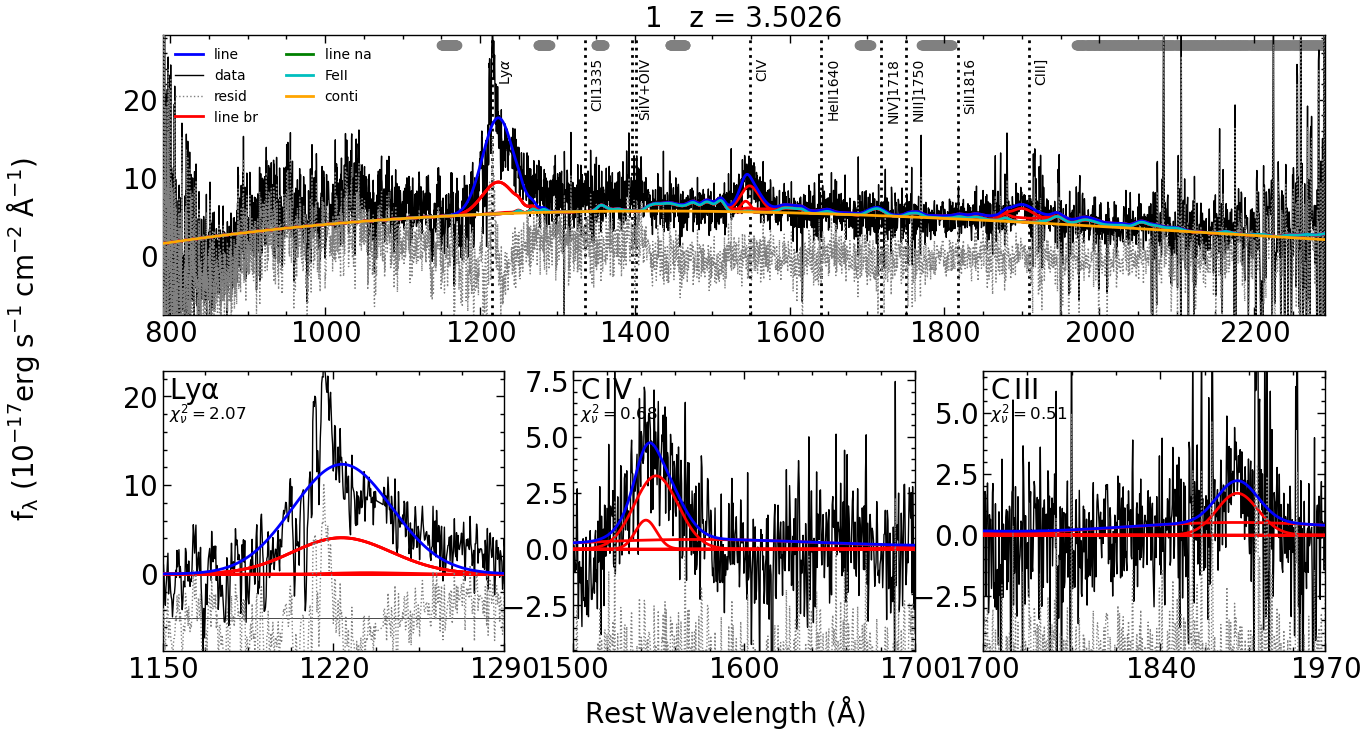

Magellan
Name            Value      Min      Max   Stderr     Vary     Expr Brute_Step
Balmer_Tau        0.5      0.1        2     None    False     None     None
Balmer_Te     1.5e+04    1e+04    5e+04     None    False     None     None
Blamer_norm         0        0    1e+10     None    False     None     None
Fe_op_FWHM       3000     1200  1.8e+04     None     True     None     None
Fe_op_norm          0        0    1e+10     None     True     None     None
Fe_op_shift         0    -0.01     0.01     None     True     None     None
Fe_uv_FWHM       3000     1200  1.8e+04     None    False     None     None
Fe_uv_norm          0        0    1e+10     None    False     None     None
Fe_uv_shift         0    -0.01     0.01     None    False     None     None
PL_norm             1        0    1e+10     None     True     None     None
PL_slope         -1.5       -5        3     None     True     None     None
conti_pl_0          0     -inf      inf     None     True     None     None
c

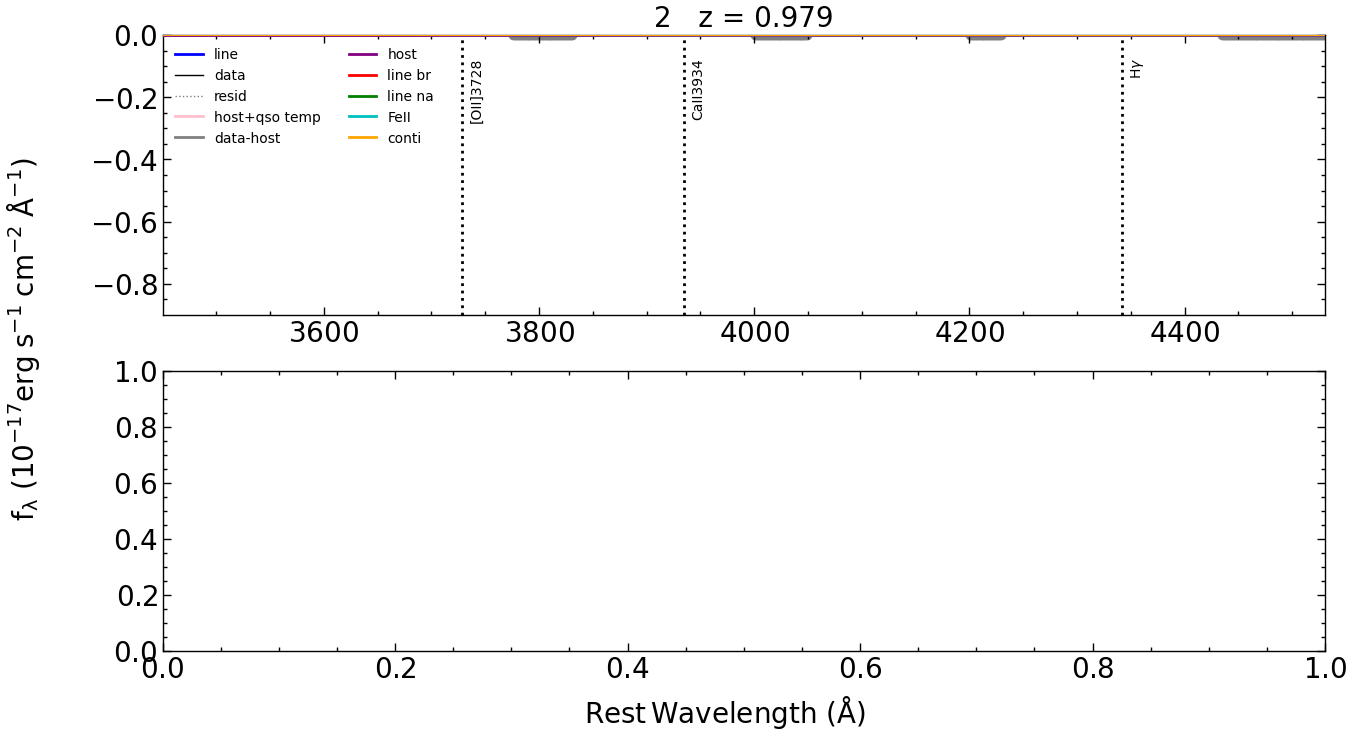

Magellan
Got negative host galaxy / QSO flux larger than 100 pixels, decomposition is not applied!
Name            Value      Min      Max   Stderr     Vary     Expr Brute_Step
Balmer_Tau        0.5      0.1        2     None    False     None     None
Balmer_Te     1.5e+04    1e+04    5e+04     None    False     None     None
Blamer_norm         0        0    1e+10     None    False     None     None
Fe_op_FWHM       3000     1200  1.8e+04     None     True     None     None
Fe_op_norm          0        0    1e+10     None     True     None     None
Fe_op_shift         0    -0.01     0.01     None     True     None     None
Fe_uv_FWHM       3000     1200  1.8e+04     None    False     None     None
Fe_uv_norm          0        0    1e+10     None    False     None     None
Fe_uv_shift         0    -0.01     0.01     None    False     None     None
PL_norm             1        0    1e+10     None     True     None     None
PL_slope         -1.5       -5        3     None     True     N

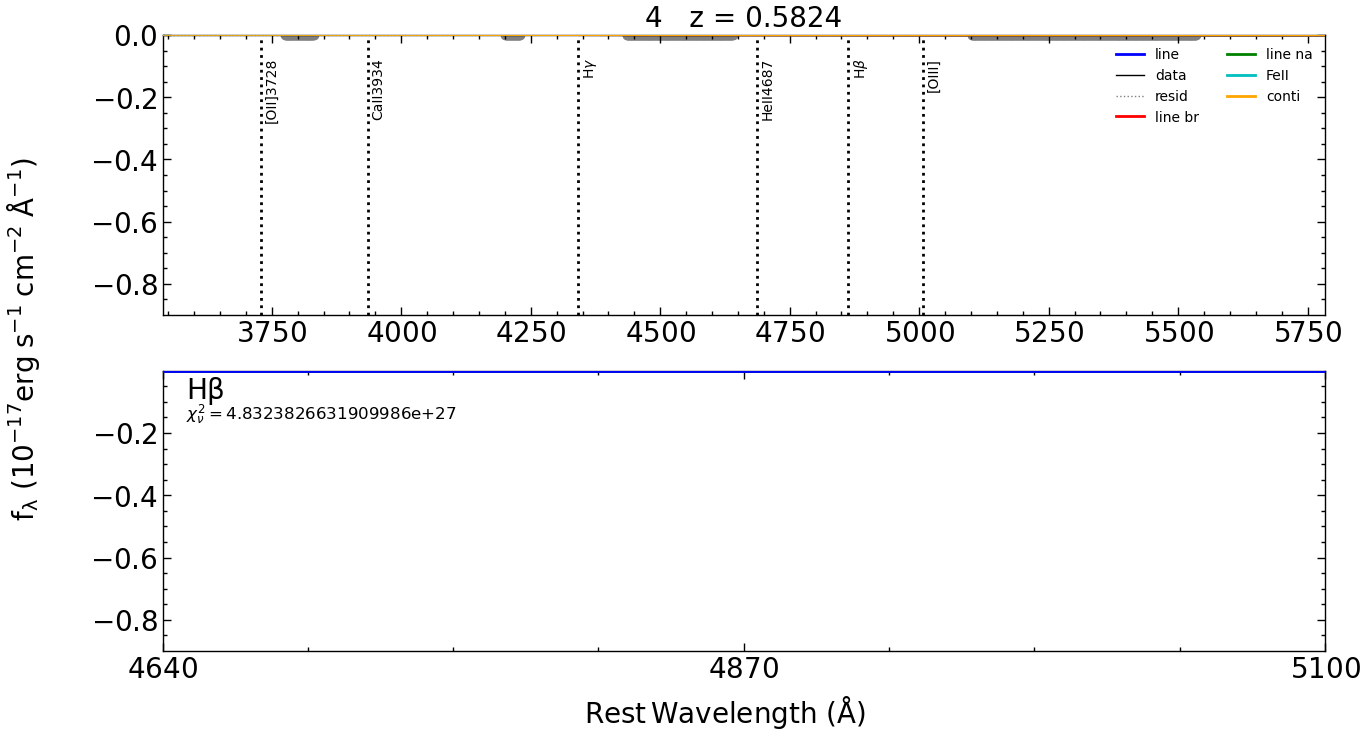

DESI
Name            Value      Min      Max   Stderr     Vary     Expr Brute_Step
Balmer_Tau        0.5      0.1        2     None    False     None     None
Balmer_Te     1.5e+04    1e+04    5e+04     None    False     None     None
Blamer_norm         0        0    1e+10     None    False     None     None
Fe_op_FWHM       3000     1200  1.8e+04     None     True     None     None
Fe_op_norm          0        0    1e+10     None     True     None     None
Fe_op_shift         0    -0.01     0.01     None     True     None     None
Fe_uv_FWHM       3000     1200  1.8e+04     None    False     None     None
Fe_uv_norm          0        0    1e+10     None    False     None     None
Fe_uv_shift         0    -0.01     0.01     None    False     None     None
PL_norm             1        0    1e+10     None     True     None     None
PL_slope         -1.5       -5        3     None     True     None     None
conti_pl_0          0     -inf      inf     None     True     None     None
conti

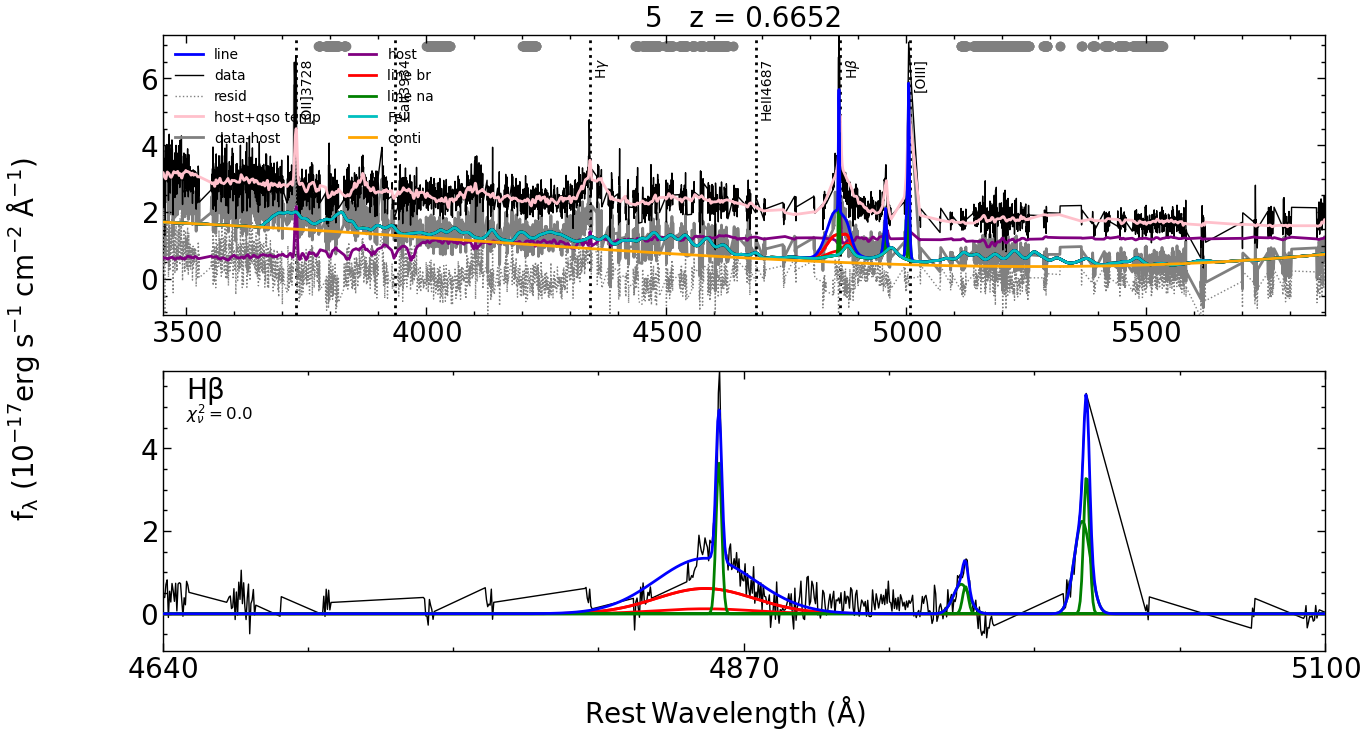

SDSS
redshift larger than 1.16 is not allowed for host decomposion!
Name            Value      Min      Max   Stderr     Vary     Expr Brute_Step
Balmer_Tau        0.5      0.1        2     None    False     None     None
Balmer_Te     1.5e+04    1e+04    5e+04     None    False     None     None
Blamer_norm         0        0    1e+10     None    False     None     None
Fe_op_FWHM       3000     1200  1.8e+04     None    False     None     None
Fe_op_norm          0        0    1e+10     None    False     None     None
Fe_op_shift         0    -0.01     0.01     None    False     None     None
Fe_uv_FWHM       3000     1200  1.8e+04     None     True     None     None
Fe_uv_norm          0        0    1e+10     None     True     None     None
Fe_uv_shift         0    -0.01     0.01     None     True     None     None
PL_norm             1        0    1e+10     None     True     None     None
PL_slope         -1.5       -5        3     None     True     None     None
conti_pl_0        

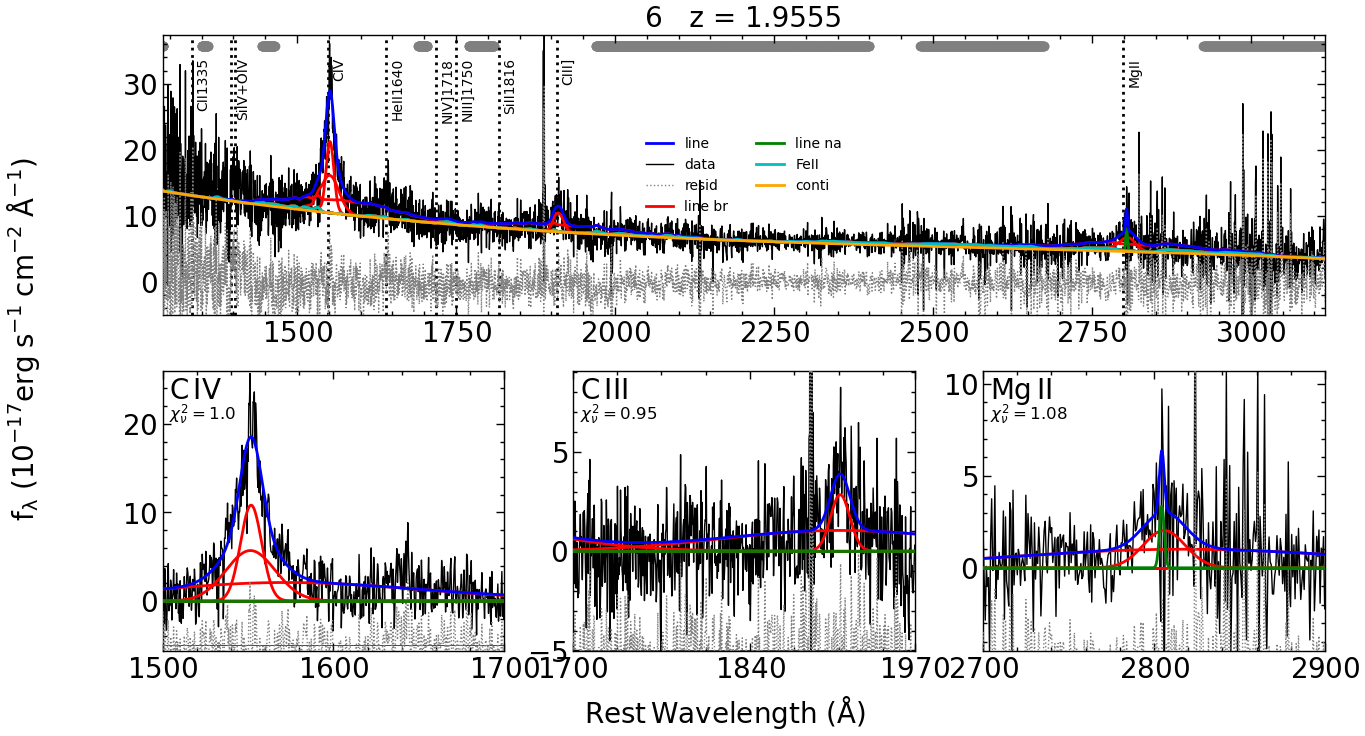

SDSS
redshift larger than 1.16 is not allowed for host decomposion!
Name            Value      Min      Max   Stderr     Vary     Expr Brute_Step
Balmer_Tau        0.5      0.1        2     None    False     None     None
Balmer_Te     1.5e+04    1e+04    5e+04     None    False     None     None
Blamer_norm         0        0    1e+10     None    False     None     None
Fe_op_FWHM       3000     1200  1.8e+04     None    False     None     None
Fe_op_norm          0        0    1e+10     None    False     None     None
Fe_op_shift         0    -0.01     0.01     None    False     None     None
Fe_uv_FWHM       3000     1200  1.8e+04     None     True     None     None
Fe_uv_norm          0        0    1e+10     None     True     None     None
Fe_uv_shift         0    -0.01     0.01     None     True     None     None
PL_norm             1        0    1e+10     None     True     None     None
PL_slope         -1.5       -5        3     None     True     None     None
conti_pl_0        

DESI
redshift larger than 1.16 is not allowed for host decomposion!
Name            Value      Min      Max   Stderr     Vary     Expr Brute_Step
Balmer_Tau        0.5      0.1        2     None    False     None     None
Balmer_Te     1.5e+04    1e+04    5e+04     None    False     None     None
Blamer_norm         0        0    1e+10     None    False     None     None
Fe_op_FWHM       3000     1200  1.8e+04     None    False     None     None
Fe_op_norm          0        0    1e+10     None    False     None     None
Fe_op_shift         0    -0.01     0.01     None    False     None     None
Fe_uv_FWHM       3000     1200  1.8e+04     None     True     None     None
Fe_uv_norm          0        0    1e+10     None     True     None     None
Fe_uv_shift         0    -0.01     0.01     None     True     None     None
PL_norm             1        0    1e+10     None     True     None     None
PL_slope         -1.5       -5        3     None     True     None     None
conti_pl_0        

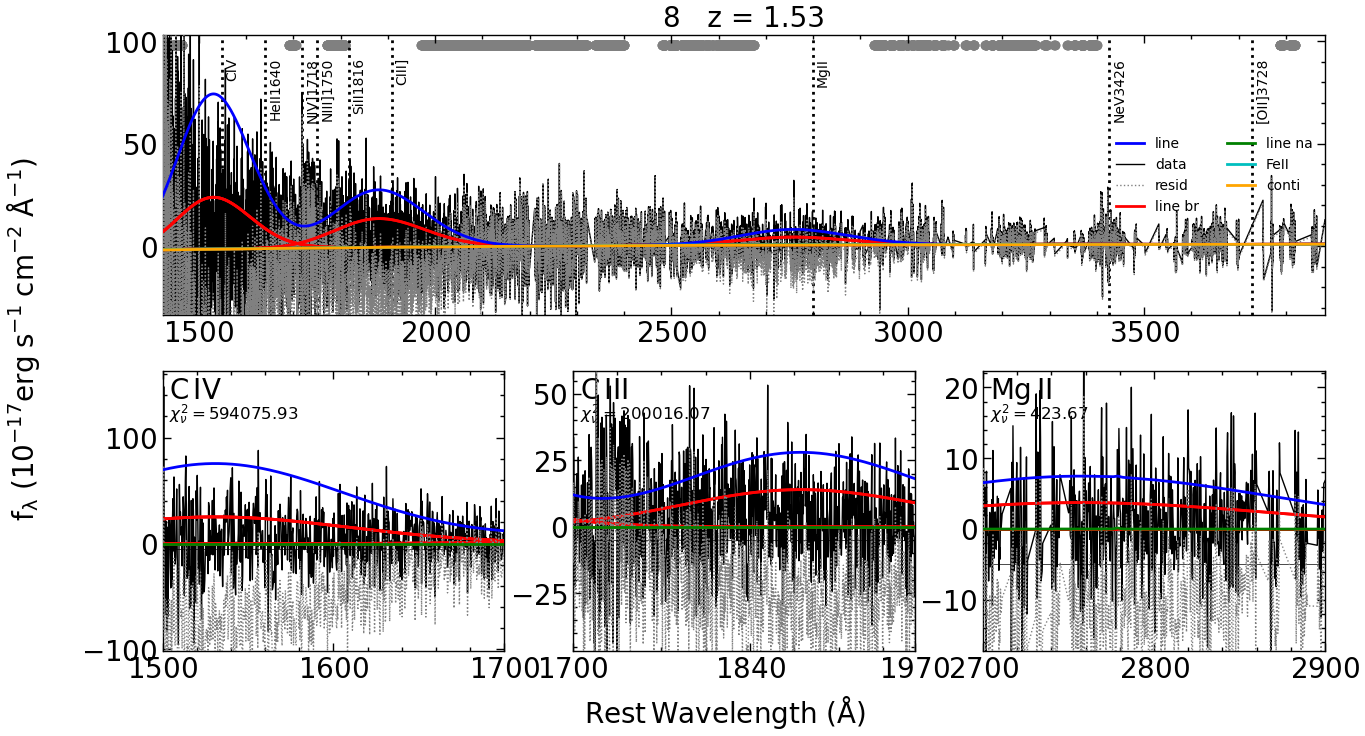

DEIMOS
redshift larger than 1.16 is not allowed for host decomposion!
Name            Value      Min      Max   Stderr     Vary     Expr Brute_Step
Balmer_Tau        0.5      0.1        2     None    False     None     None
Balmer_Te     1.5e+04    1e+04    5e+04     None    False     None     None
Blamer_norm         0        0    1e+10     None    False     None     None
Fe_op_FWHM       3000     1200  1.8e+04     None    False     None     None
Fe_op_norm          0        0    1e+10     None    False     None     None
Fe_op_shift         0    -0.01     0.01     None    False     None     None
Fe_uv_FWHM       3000     1200  1.8e+04     None     True     None     None
Fe_uv_norm          0        0    1e+10     None     True     None     None
Fe_uv_shift         0    -0.01     0.01     None     True     None     None
PL_norm             1        0    1e+10     None     True     None     None
PL_slope         -1.5       -5        3     None     True     None     None
conti_pl_0      

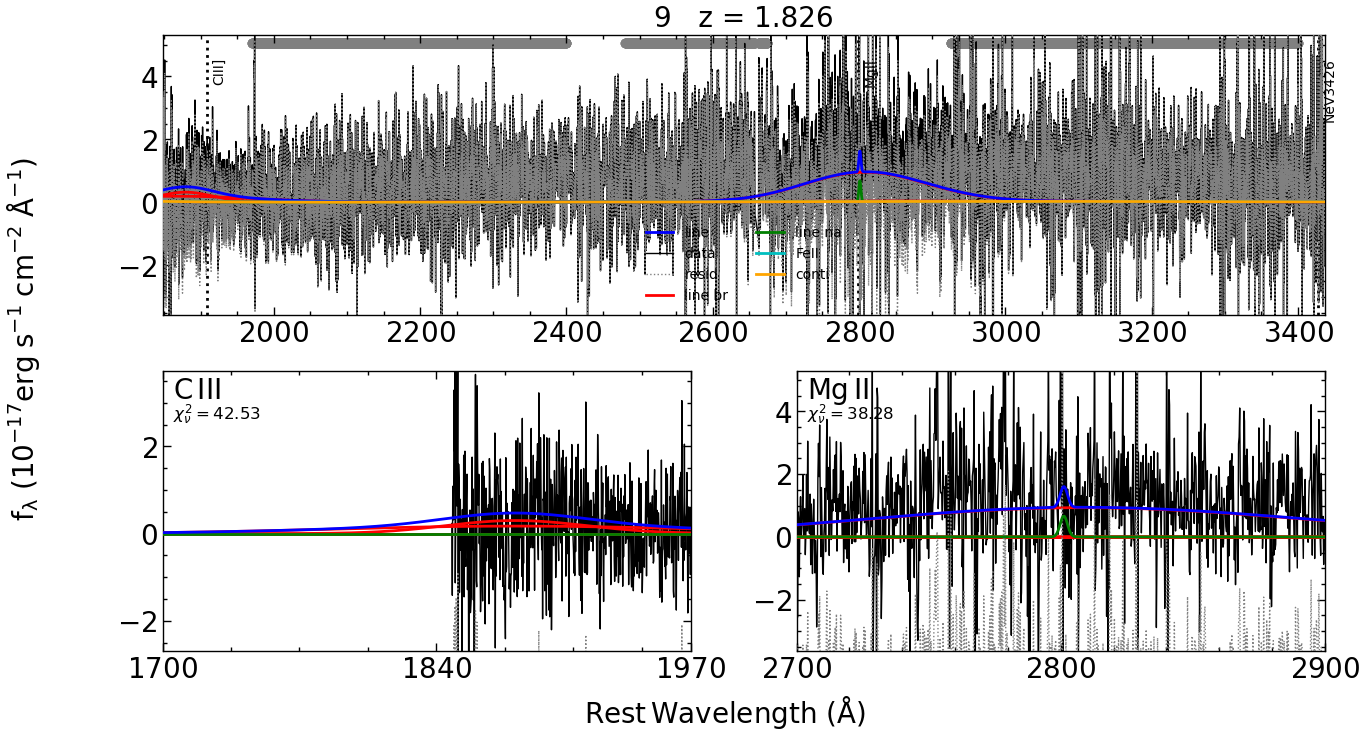

Magellan
Got negative host galaxy / QSO flux larger than 100 pixels, decomposition is not applied!
Name            Value      Min      Max   Stderr     Vary     Expr Brute_Step
Balmer_Tau        0.5      0.1        2     None    False     None     None
Balmer_Te     1.5e+04    1e+04    5e+04     None    False     None     None
Blamer_norm         0        0    1e+10     None    False     None     None
Fe_op_FWHM       3000     1200  1.8e+04     None     True     None     None
Fe_op_norm          0        0    1e+10     None     True     None     None
Fe_op_shift         0    -0.01     0.01     None     True     None     None
Fe_uv_FWHM       3000     1200  1.8e+04     None     True     None     None
Fe_uv_norm          0        0    1e+10     None     True     None     None
Fe_uv_shift         0    -0.01     0.01     None     True     None     None
PL_norm             1        0    1e+10     None     True     None     None
PL_slope         -1.5       -5        3     None     True     N

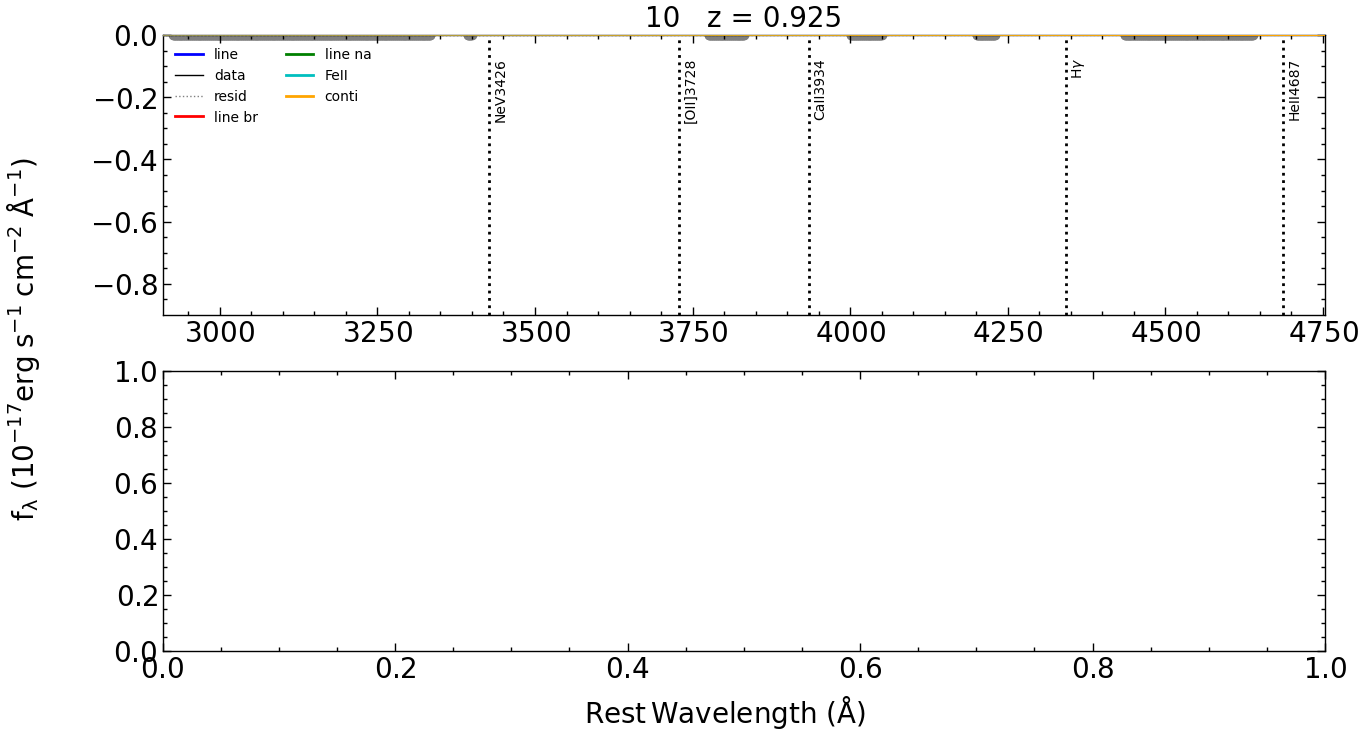

SDSS
redshift larger than 1.16 is not allowed for host decomposion!
Name            Value      Min      Max   Stderr     Vary     Expr Brute_Step
Balmer_Tau        0.5      0.1        2     None    False     None     None
Balmer_Te     1.5e+04    1e+04    5e+04     None    False     None     None
Blamer_norm         0        0    1e+10     None    False     None     None
Fe_op_FWHM       3000     1200  1.8e+04     None    False     None     None
Fe_op_norm          0        0    1e+10     None    False     None     None
Fe_op_shift         0    -0.01     0.01     None    False     None     None
Fe_uv_FWHM       3000     1200  1.8e+04     None     True     None     None
Fe_uv_norm          0        0    1e+10     None     True     None     None
Fe_uv_shift         0    -0.01     0.01     None     True     None     None
PL_norm             1        0    1e+10     None     True     None     None
PL_slope         -1.5       -5        3     None     True     None     None
conti_pl_0        

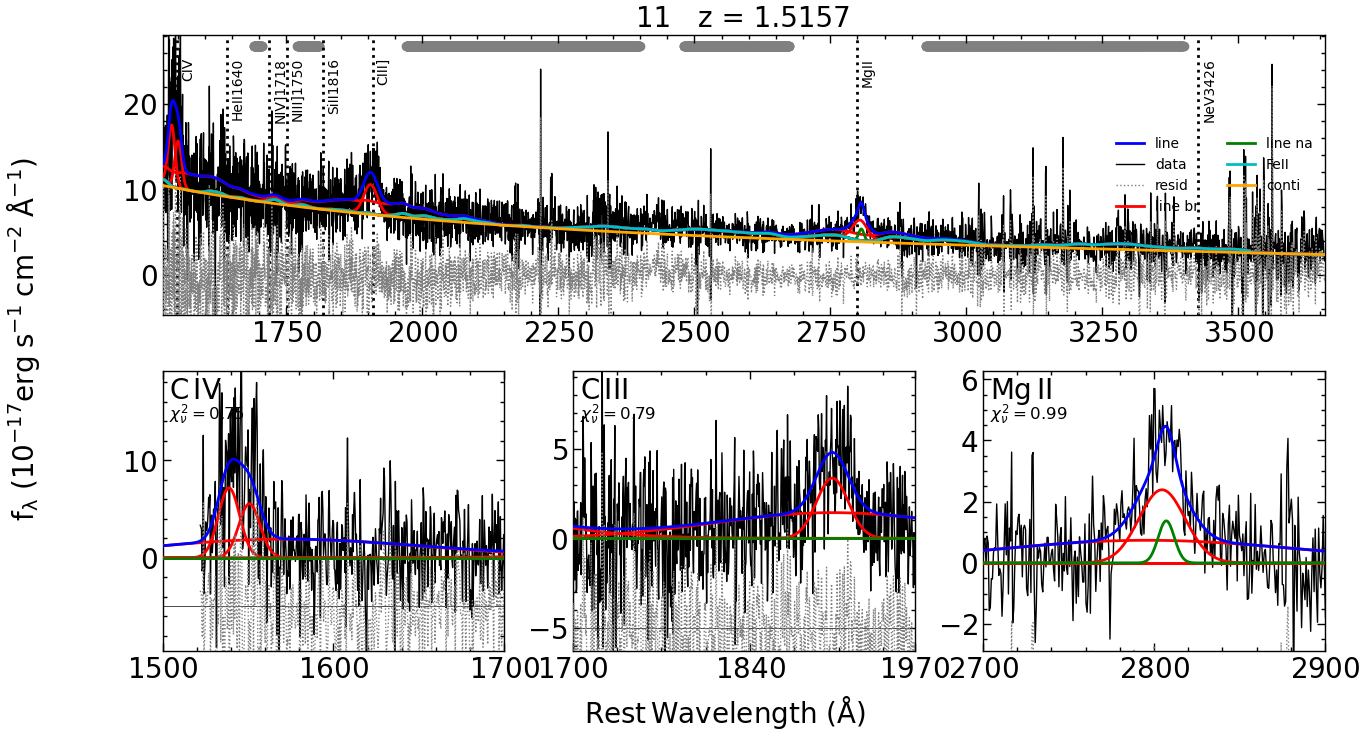

Magellan
redshift larger than 1.16 is not allowed for host decomposion!
Name            Value      Min      Max   Stderr     Vary     Expr Brute_Step
Balmer_Tau        0.5      0.1        2     None    False     None     None
Balmer_Te     1.5e+04    1e+04    5e+04     None    False     None     None
Blamer_norm         0        0    1e+10     None    False     None     None
Fe_op_FWHM       3000     1200  1.8e+04     None     True     None     None
Fe_op_norm          0        0    1e+10     None     True     None     None
Fe_op_shift         0    -0.01     0.01     None     True     None     None
Fe_uv_FWHM       3000     1200  1.8e+04     None     True     None     None
Fe_uv_norm          0        0    1e+10     None     True     None     None
Fe_uv_shift         0    -0.01     0.01     None     True     None     None
PL_norm             1        0    1e+10     None     True     None     None
PL_slope         -1.5       -5        3     None     True     None     None
conti_pl_0    

ValueError: need at least one array to concatenate

In [10]:
line_cen = np.array( [6564.60,            4862.68,    2797,    1908, 1549.06, 1215.67])
line_name = np.array([r'H$\alpha$+[NII]', r'H$\beta$','MgII'  , 'CIII]', 'CIV',   r'Ly$\alpha$'])

wmin = 4000
wmax = 11000

#for i,ID in enumerate(data_agn_download['ID'][z_count>1]): 
for i,ID in enumerate(data_agn_updated['ID']):
    
    ra = data_agn_updated['RAdeg'][i]
    dec = data_agn_updated['DEdeg'][i]

    z = data_agn_updated['z'][i]

    src = ''
    
    # zCOSMOS
    if os.path.isfile('spec/zCOSMOS/zcosmos_%d.fits'%ID): 

        src = 'zCOSMOS'
        
        hdu0 = fits.open('spec/zCOSMOS/zcosmos_%d.fits'%ID)
        data0 = hdu0[1].data
        wave = data0['WAVE'][0]
        flux = data0['FLUX_REDUCED'][0]/1e-17
        # No error providede, assume ~10%
        flux_err = 0.1*data0['FLUX_REDUCED'][0]/1e-17
            
    # Magellan
    if os.path.isfile('spec/Magellan/magellan_%d.fits'%ID): 

        src = 'Magellan'
        
        hdu1 = fits.open('spec/Magellan/magellan_%d.fits'%ID)
        data1 = hdu1[0].data
        wave = data1[0]
        flux = data1[1]
        flux_err = data1[2]


    # DEIMOS
    if os.path.isfile('spec/DEIMOS/deimos_%d.fits'%ID): 

        src = 'DEIMOS'
        
        hdu3 = fits.open('spec/DEIMOS/deimos_%d.fits'%ID)
        
        data3 = hdu3[1].data
        if 'FLUX' not in data3.names:
            continue
        
        wave = data3['LAMBDA'][0]
        flux = data3['FLUX'][0]*1e-19/1e-17
        #flux_err = 1/np.sqrt(data3['IVAR'][0])*1e-19/1e-17
        # No error providede, assume ~10%
        flux_err = 0.1*flux

                
    # SDSS
    if os.path.isfile('spec/SDSS/sdss_%d.fits'%ID): 
        
        src = 'SDSS'
        
        hdu = fits.open('spec/SDSS/sdss_%d.fits'%ID)
        mask = np.isfinite(hdu[1].data['flux'])
        wave = 10**hdu[1].data['loglam'][mask]
        flux = hdu[1].data['flux'][mask]
        flux_err = 1/np.sqrt(hdu[1].data['ivar'][mask])

    # DESI
    if os.path.isfile('spec/desi/desi_%d.txt'%ID):

        src = 'DESI'
        
        data_spec = ascii.read('spec/desi/desi_%d.txt'%ID)

        wave = data_spec['col1']
        flux = data_spec['col2']
        flux_err = data_spec['col3']

    # 3D-HST
    """
    if os.path.isfile('spec/3D HST/3dhst_%d.fits'%ID): 

        z_3dhst = data_agn_download['z_3dhst'][ID-1]
        
        hdu = fits.open('spec/3D HST/3dhst_%d.fits'%ID)
        flux_3dhst = hdu[1].data['flux']*hdu[1].data['sensitivity']
        ax.plot(hdu[1].data['wave'], flux_3dhst,
                 label=f'3D-HST (z={z_3dhst})', color='b', linewidth=1);
        
        mask = np.isfinite(flux_3dhst)
        ylim = np.max([ylim, np.nanmax(flux_3dhst[mask])])
    """            

    if src != '':
        
        print(src)

        # Prepare data
        q = QSOFit(wave, flux, flux_err, z, path=path_ex)
        q.Fit(name=i, nsmooth=1, deredden=True, reject_badpix=False,  #wave_range= np.array([1000, 11000]), \
              wave_mask=None, decompose_host=True, BC03=False, npca_gal=5, npca_qso=10, \
              Fe_uv_op=True, poly=True, rej_abs_conti=False, rej_abs_line=True, MC=False, nsamp=200, linefit=True, \
              save_result=False, kwargs_plot={'save_fig_path': '.'}, save_fits_name=None, verbose=True, save_fig=False)

        plt.show()
    # Do the fitting  #wave_range= np.array([1000, 11000]), \

In [ ]:
data3.names

In [ ]:
hdu[1].data.names